In [ ]:
# import pandas as pd
# import numpy as np

# # Objective
# # 	To convert the two-time series into states.
# #	This is a simple rules based model to test your capability in a quick format in Python, there are no machine learning models required.
# #	This test should take about 1 hour for a person with 2 years or more experience, someone with less should expect to take a little more.  

# # Task
# # 	Refer to the table below.  
# #		There are two columns containing time series data O and P.   
# #		Both columns are time series, the time series data has a direction, either moving up or down.
# #		Try to figure out the direction for each time stamp.
# #		You can search how the direction of time series is found using window of data.
# #		Using both columns and their directions find the correct state. 
# #		Figure out, by using these 4 elements, how you can identify the state as given in table.
# #		Look at the data, analyze it, you will get the answer.
# # 	You can refer to the table column Direction as example of the trend. 

# # 	Figure out the condition of these states and write a function get_label which takes df data-frame as the input, and outputs the states.  
# # 	Your result should match the 'State' column from the data-frame.
# #	Send us the function get_label that you have created.

# # Data
# #	The data to used is given below in uncommented section.

# # Ideas
# # 	Oscillating Wave
# # 	Labeling. Use labels for your states as numbers in representing A,B,C, etc... to P. as 1,2,3,4, etc.
# # 	Take look-back window size (rolling avg window size) of your choice for a period of time to get the direction
# # 	Select the data as per window size and pass it to function get_label
# # 	i.e. positive and negative are the representative trend direction for the two time-series mention in the table
# # 	Check data-frame list is Ascending OR Descending, figuring trend direction for each of the two oscillator values

# # Labeling States A to P (total of 16 individual states)
# #
# #+----+-------+-----------+-------+-----------+-------+  
# #|  # |   O   | Direction |   P   | Direction | State |  
# #+----+-------+-----------+-------+-----------+-------+  
# #|  1 |  0.20 |     +     |  0.22 |     +     |   A   |  
# #|  2 |  0.15 |     +     |  0.20 |     -     |   E   |  
# #|  3 |  0.12 |     -     |  0.21 |     +     |   I   |  
# #|  4 |  0.09 |     -     |  0.15 |     -     |   M   |  
# #|  5 | -0.01 |     +     |  0.10 |     +     |   B   |  
# #|  6 | -0.02 |     +     |  0.07 |     -     |   F   |  
# #|  7 | -0.03 |     -     |  0.09 |     +     |   J   |  
# #|  8 | -0.05 |     -     |  0.05 |     -     |   N   |  
# #|  9 |  0.10 |     +     | -0.01 |     +     |   C   |  
# #| 10 |  0.07 |     +     | -0.03 |     -     |   G   |  
# #| 11 |  0.05 |     -     | -0.02 |     +     |   K   |  
# #| 12 |  0.02 |     -     | -0.05 |     -     |   O   |  
# #| 13 | -0.09 |     +     | -0.10 |     +     |   D   |  
# #| 14 | -0.12 |     +     | -0.22 |     -     |   H   |  
# #| 15 | -0.15 |     -     | -0.20 |     +     |   L   |  
# #| 16 | -0.20 |     -     | -0.25 |     -     |   P   |  
# #+----+-------+-----------+-------+-----------+-------+  

# # Table: Above is the state for each in the time series for the 2 oscillators
# # Direction can also be referred to as the trend direction being (positive or negative)

# # Sample Data - 1 Cycle - 16 States for the example above
# # Cycles will continue in the time series


# # Larger sample data  set

# df = pd.DataFrame({
#     'o': [0.21,0.22,0.25,0.28,0.32,0.33,0.34,0.35,0.36,0.37,0.36,0.35,0.33,0.31,0.29,0.28,0.25,0.21,0.19,0.17,-0.12,-0.11,-0.09,-0.08,-0.07,-0.05,-0.04,-0.03,-0.02,-0.01,-0.01,-0.02,-0.03,-0.04,-0.05,-0.06,-0.07,-0.09,-0.11,-0.13,0.02,0.5,0.08,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.11,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,-0.11,-0.09,-0.08,-0.07,-0.06,-0.05,-0.04,-0.03,-0.02,-0.01,-0.02,-0.06,-0.09,-0.13,-0.17,-0.21,-0.22,-0.23,-0.24,-0.25, ],
#     'p': [0.22,0.24,0.26,0.29,0.32,0.31,0.29,0.28,0.27,0.26,0.27,0.28,0.29,0.32,0.33,0.31,0.28,0.27,0.26,0.25,0.26,0.27,0.28,0.29,0.31,0.23,0.17,0.11,0.08,0.07,0.08,0.09,0.12,0.13,0.14,0.12,0.09,0.05,0.03,0.01,-0.05,-0.04,-0.03,-0.02,-0.01,-0.03,-0.04,-0.05,-0.06,-0.07,-0.06,-0.05,-0.04,-0.02,-0.01,-0.02,-0.07,-0.09,-0.11,-0.12,-0.11,-0.09,-0.07,-0.06,-0.05,-0.08,-0.11,-0.14,-0.22,-0.26,-0.21,-0.18,-0.15,-0.13,-0.12,-0.13,-0.16,-0.17,-0.21,-0.25, ],
#     'State': ['A','A','A','A','A','E','E','E','E','E','I','I','I','I','I','M','M','M','M','M','B','B','B','B','B','F','F','F','F','F','J','J','J','J','J','N','N','N','N','N','C','C','C','C','C','G','G','G','G','G','K','K','K','K','K','O','O','O','O','O','D','D','D','D','D','H','H','H','H','H','L','L','L','L','L','P','P','P','P','P',],
# })


# # Need help. Draw an illustration of a visual for Oscillator Histogram (then overlay two together as different colors dark & light)
# # If you are not able to figure out anything, ask for help.

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

df_test = pd.DataFrame({
    'o': [0.20, 0.15, 0.12, 0.09, -0.01, -0.02, -0.03, -0.05, 0.10, 0.07, 0.05, 0.02, -0.09, -0.12, -0.15, -0.20, ],
    'p': [0.22, 0.20, 0.21, 0.15, 0.10, 0.07, 0.09, 0.05, -0.01, -0.03, -0.02, -0.05, -0.10, -0.22, -0.20, -0.25, ],
})
df_train = pd.DataFrame({
    'o': [0.21,0.22,0.25,0.28,0.32,0.33,0.34,0.35,0.36,0.37,0.36,0.35,0.33,0.31,0.29,0.28,0.25,0.21,0.19,0.17,-0.12,-0.11,-0.09,-0.08,-0.07,-0.05,-0.04,-0.03,-0.02,-0.01,-0.01,-0.02,-0.03,-0.04,-0.05,-0.06,-0.07,-0.09,-0.11,-0.13,0.02,0.5,0.08,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.11,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,-0.11,-0.09,-0.08,-0.07,-0.06,-0.05,-0.04,-0.03,-0.02,-0.01,-0.02,-0.06,-0.09,-0.13,-0.17,-0.21,-0.22,-0.23,-0.24,-0.25, ],
    'p': [0.22,0.24,0.26,0.29,0.32,0.31,0.29,0.28,0.27,0.26,0.27,0.28,0.29,0.32,0.33,0.31,0.28,0.27,0.26,0.25,0.26,0.27,0.28,0.29,0.31,0.23,0.17,0.11,0.08,0.07,0.08,0.09,0.12,0.13,0.14,0.12,0.09,0.05,0.03,0.01,-0.05,-0.04,-0.03,-0.02,-0.01,-0.03,-0.04,-0.05,-0.06,-0.07,-0.06,-0.05,-0.04,-0.02,-0.01,-0.02,-0.07,-0.09,-0.11,-0.12,-0.11,-0.09,-0.07,-0.06,-0.05,-0.08,-0.11,-0.14,-0.22,-0.26,-0.21,-0.18,-0.15,-0.13,-0.12,-0.13,-0.16,-0.17,-0.21,-0.25, ],
    'State': ['A','A','A','A','A','E','E','E','E','E','I','I','I','I','I','M','M','M','M','M','B','B','B','B','B','F','F','F','F','F','J','J','J','J','J','N','N','N','N','N','C','C','C','C','C','G','G','G','G','G','K','K','K','K','K','O','O','O','O','O','D','D','D','D','D','H','H','H','H','H','L','L','L','L','L','P','P','P','P','P',],
})
df_train.head(10)



,State,o,p
0,A,0.21,0.22
1,A,0.22,0.24
2,A,0.25,0.26
3,A,0.28,0.29
4,A,0.32,0.32
5,E,0.33,0.31
6,E,0.34,0.29
7,E,0.35,0.28
8,E,0.36,0.27
9,E,0.37,0.26


In [4]:
def count(length):
    a=[0 for i in range(length)]
    for i in range(length//2):
        if i%2==0:
            a[2*i]=1
            a[(2*i)+1]=1
    return a
length=df_train['o'].count()
a=count(length)
        
df_train['o_direcition'] = a


df_train['p_direcition'] = 1

df_train.loc[1::2,"p_direcition"] = 0
### for test

length2=df_test['o'].count()
a2=count(length2)
        
df_test['o_direcition'] = a2


df_test['p_direcition'] = 1

df_test.loc[1::2,"p_direcition"] = 0


In [11]:
df_train=df_train.sort_values(by=['State'])
print(df_train.head(5))
print(df_test.head(5))



  State     o     p  o_direcition  p_direcition
0     A  0.21  0.22             1             1
1     A  0.22  0.24             1             0
2     A  0.25  0.26             0             1
3     A  0.28  0.29             0             0
4     A  0.32  0.32             1             1
      o     p  o_direcition  p_direcition
0  0.20  0.22             1             1
1  0.15  0.20             1             0
2  0.12  0.21             0             1
3  0.09  0.15             0             0
4 -0.01  0.10             1             1


In [13]:
df_train.describe()




,o,p,o_direcition,p_direcition
count,80.000000,80.000000,80.000000,80.000000
mean,0.058000,0.058000,0.500000,0.500000
std,0.174924,0.176846,0.503155,0.503155
min,-0.250000,-0.260000,0.000000,0.000000
25%,-0.070000,-0.072500,0.000000,0.000000
50%,0.000000,0.000000,0.500000,0.500000
75%,0.190000,0.260000,1.000000,1.000000
max,0.500000,0.330000,1.000000,1.000000


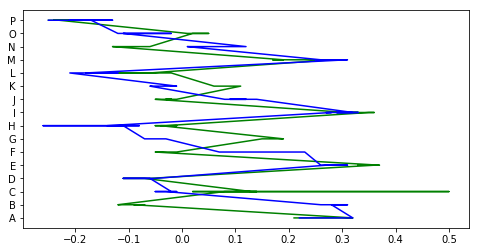

In [14]:
# includes +ve and -ve direction
plt.figure(figsize=(8,4))


plt.plot(df_train["o"],df_train["State"],'g',label='input_x')
plt.plot(df_train["p"],df_train["State"],'b',label='input_x')

(array([ 3.,  6.,  4., 47.,  1.,  3.,  2.,  2.,  5.,  7.]),
 array([-2.20000000e-01, -1.65000000e-01, -1.10000000e-01, -5.50000000e-02,
         2.77555756e-17,  5.50000000e-02,  1.10000000e-01,  1.65000000e-01,
         2.20000000e-01,  2.75000000e-01,  3.30000000e-01]),
 <a list of 10 Patch objects>)

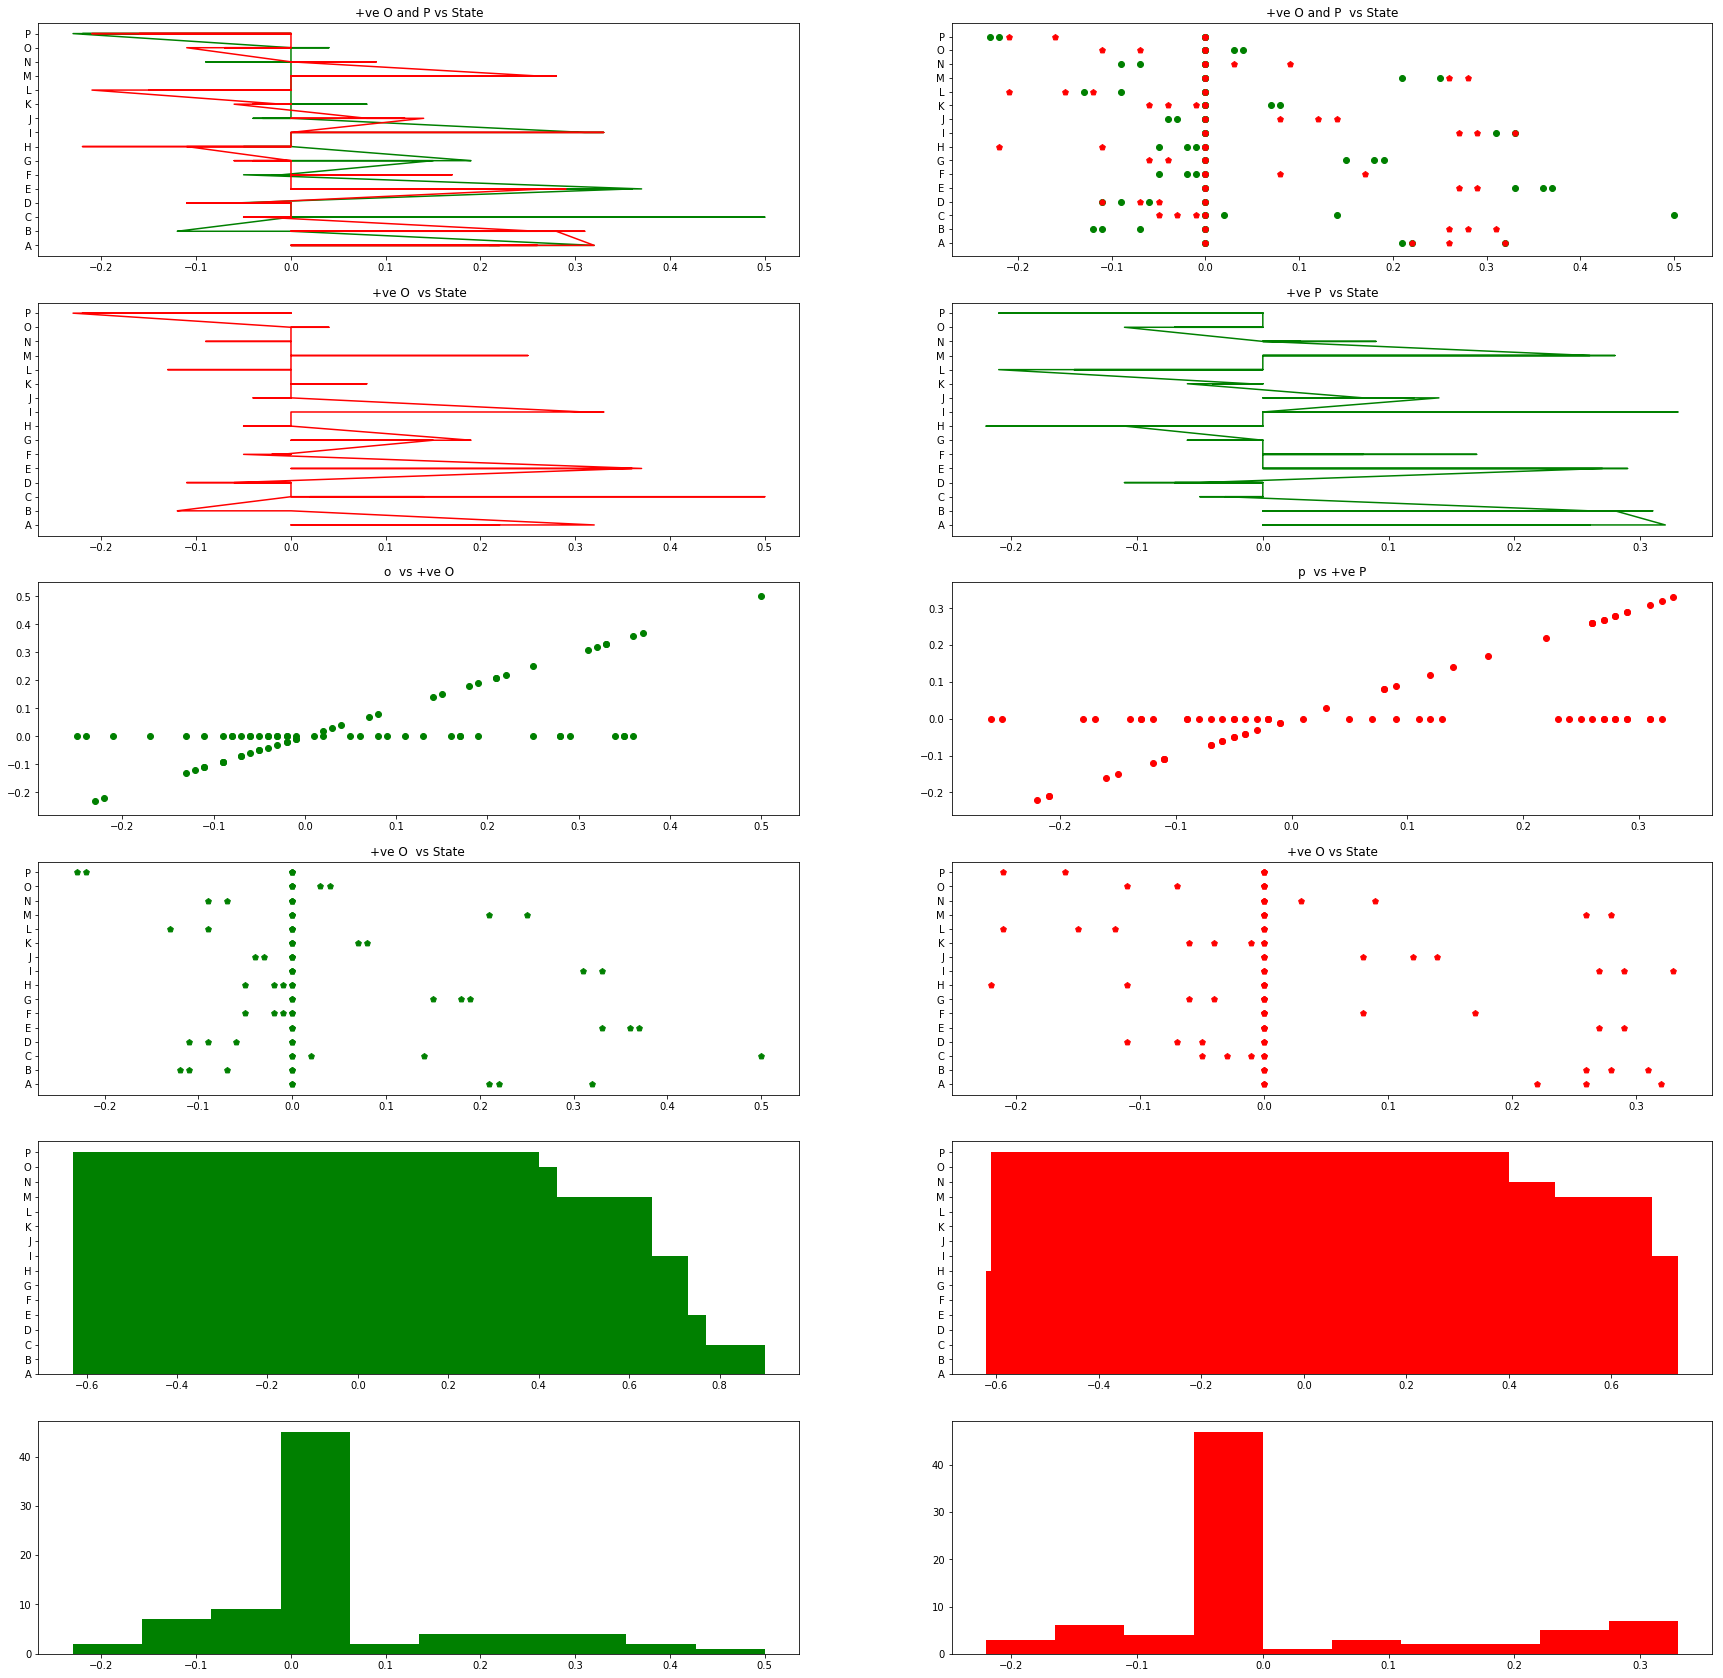

In [102]:
# only +ve Direction
n=30
fig = plt.figure(figsize=(n,n))
ax = fig.subplots(6,2)

O = df_train["o"]*df_train["o_direcition"]
df_train["O"]=O
P=df_train["p"]*df_train["p_direcition"]
df_train["P"]=P

ax[0,0].set_title('+ve O and P vs State')
ax[0,0].plot(O,df_train["State"],'g',label='input_x')
ax[0,0].plot(P,df_train["State"],'r',label='input_x')
ax[0,1].set_title('+ve O and P  vs State')
ax[0,1].scatter(O,df_train["State"],marker="o",color="g")
ax[0,1].scatter(P,df_train["State"],marker="p",color="r")
ax[1,0].set_title('+ve O  vs State')
ax[1,0].plot(O,df_train["State"],'r',label='input_x')
ax[1,1].set_title('+ve P  vs State')
ax[1,1].plot(P,df_train["State"],'g',label='input_x')
ax[2,0].set_title('o  vs +ve O')
ax[2,0].scatter(df_train["o"],O,marker="o",color="g")
ax[2,1].set_title('p  vs +ve P')
ax[2,1].scatter(df_train["p"],P,marker="o",color="r")
ax[3,0].set_title('+ve O  vs State ')
ax[3,0].scatter(O,df_train["State"],marker="p",color="g")
ax[3,1].set_title('+ve O vs State')
ax[3,1].scatter(P,df_train["State"],marker="p",color="r")
ax[4,0].bar(O,df_train["State"],color="g")
ax[4,1].bar(P,df_train["State"],color="r")
ax[5,0].hist(O,color="g")
ax[5,1].hist(P,color="r")




In [25]:
df_train.describe()

,o,p,o_direcition,p_direcition,O,P
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,0.058000,0.058000,0.500000,0.500000,0.033625,0.030750
std,0.174924,0.176846,0.503155,0.503155,0.131652,0.128287
min,-0.250000,-0.260000,0.000000,0.000000,-0.230000,-0.220000
25%,-0.070000,-0.072500,0.000000,0.000000,-0.002500,-0.002500
50%,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000
75%,0.190000,0.260000,1.000000,1.000000,0.005000,0.007500
max,0.500000,0.330000,1.000000,1.000000,0.500000,0.330000


mu 0.033625 sigma 0.13165205147747547


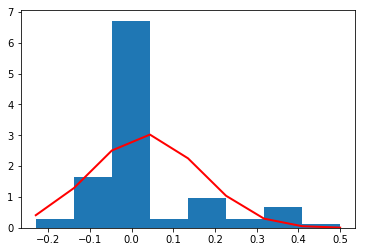

mu 0.03075 sigma 0.12828740479036943


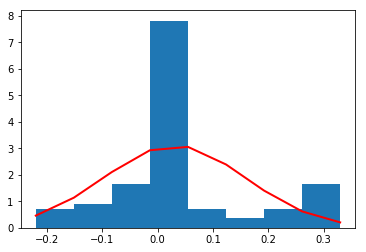

In [26]:
# riskChart["x"]=riskChart["good"]*riskChart["Age"]
# riskChart["y"]=riskChart["good"]*riskChart["Duration"]
def Gaussian(n):
    mu, sigma = n.mean(), n.std() # mean and standard deviation
    # Verify the mean and the variance:
    print("mu",mu, "sigma",sigma)
    abs(mu - np.mean(n)) < 0.01

    abs(sigma - np.std(n, ddof=1)) < 0.01

    # Display the histogram of the samples, along with the probability density function:
    count, bins, ignored = plt.hist(n,8, density=True)

    formula=1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) )

    plt.plot(bins, formula,linewidth=2, color='r')
    plt.show()



n=df_train["O"]
Gaussian(n)
m=df_train["P"]
Gaussian(m)




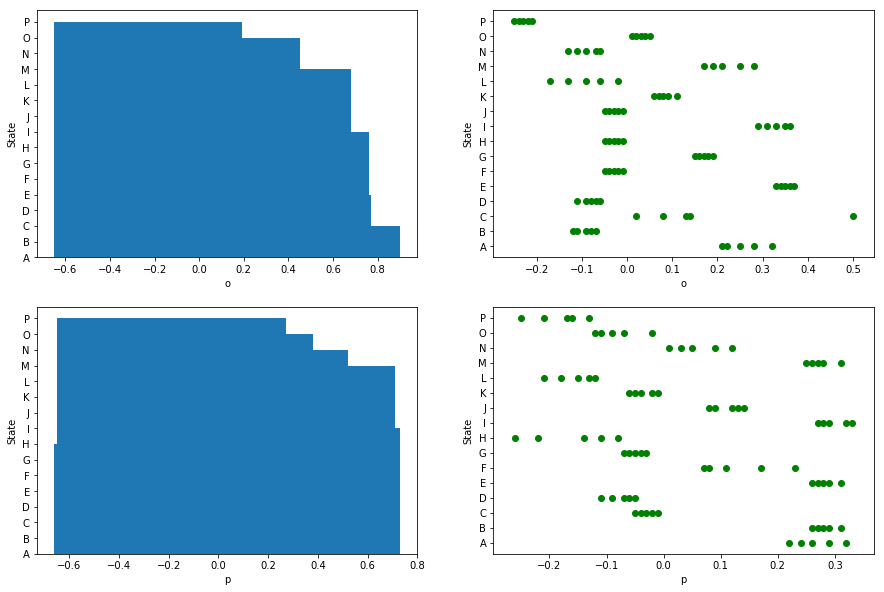

In [29]:
fig = plt.figure(figsize=(15,10))
ax = fig.subplots(2,2)


ax[0,0].bar(df_train["o"],df_train["State"])
ax[0,1].scatter(df_train["o"],df_train["State"],marker="o",color="g")
ax[0,0].set(xlabel="o",ylabel="State")
ax[0,1].set(xlabel="o",ylabel="State")
ax[1,0].bar(df_train["p"],df_train["State"])
ax[1,1].scatter(df_train["p"],df_train["State"],marker="o",color="g")
ax[1,0].set(xlabel="p",ylabel="State")
ax[1,1].set(xlabel="p",ylabel="State")
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
features = df_train.drop(labels=['State','O','P'],axis=1)
targets = pd.DataFrame(df_train['State'])
feature_test=df_test
# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(feature_test.shape)
features.head(3)




(64, 4)
(16, 4)
(64, 1)
(16, 1)
(16, 4)


,o,p,o_direcition,p_direcition
0,0.21,0.22,1,1
1,0.22,0.24,1,0
2,0.25,0.26,0,1


In [31]:
# fit() : used for generating learning model parameters from training data

# transform() : parameters generated from fit() method,applied upon model to generate transformed data set.

# fit_transform() : combination of fit() and transform() api on same data set



from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)
features_test = sc.transform(feature_test)
# features_test = sc.transform(user_info_table)
# X_test = sc.transform(user_info_test)
# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y_train = LabelEncoder()
y_train = labelencoder_y_train.fit_transform(y_train)
labelencoder_y_test = LabelEncoder()
y_test = labelencoder_y_test.fit_transform(y_test)

/anaconda3/envs/self_driving/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(feature_test)
    for i in range(5):
        print("Predicted=%s" % (model_pred[i]))
    model_pred = model.predict(X_test)
    print("prediction on sample")
    for i in range(5):
        print("X=%s, Predicted=%s" % (model_pred[i], y_test[i]))
    model_cross = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_cross





In [33]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr)

print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % logr_cross)

Predicted=10
Predicted=4
Predicted=10
Predicted=12
Predicted=3
prediction on sample
X=7, Predicted=5
X=8, Predicted=0
X=8, Predicted=3
X=10, Predicted=5
X=11, Predicted=2
Logistic Regression Performance on the test set: Cross Validation Score = 0.2862


/anaconda3/envs/self_driving/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [34]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb_cross = fit_and_evaluate(gnb)

print('GaussianNB Performance on the test set: Cross Validation Score = %0.4f' % gnb_cross)

Predicted=14
Predicted=14
Predicted=14
Predicted=14
Predicted=14
prediction on sample
X=6, Predicted=5
X=12, Predicted=0
X=8, Predicted=3
X=2, Predicted=5
X=13, Predicted=2
GaussianNB Performance on the test set: Cross Validation Score = 0.4409


/anaconda3/envs/self_driving/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [50]:
from sklearn.svm import SVC
svc = SVC(kernel="linear",degree=5)
svc_cross = fit_and_evaluate(svc)

print('SVC Performance on the test set: Cross Validation Score = %0.4f' % svc_cross)

Predicted=10
Predicted=5
Predicted=9
Predicted=5
Predicted=5
prediction on sample
X=14, Predicted=5
X=12, Predicted=0
X=8, Predicted=3
X=10, Predicted=5
X=13, Predicted=2
SVC Performance on the test set: Cross Validation Score = 0.3351


/anaconda3/envs/self_driving/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 23)
knn_cross = fit_and_evaluate(knn)

print('KNN Performance on the test set: Cross Validation Score = %0.4f' % knn_cross)

Predicted=5
Predicted=1
Predicted=1
Predicted=5
Predicted=5
prediction on sample
X=2, Predicted=5
X=8, Predicted=0
X=8, Predicted=3
X=10, Predicted=5
X=11, Predicted=2
KNN Performance on the test set: Cross Validation Score = 0.2230


/anaconda3/envs/self_driving/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [53]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive_cross = fit_and_evaluate(naive)

print('Naive Bayes Performance on the test set: Cross Validation Score = %0.4f' % naive_cross)

Predicted=14
Predicted=14
Predicted=14
Predicted=14
Predicted=14
prediction on sample
X=6, Predicted=5
X=12, Predicted=0
X=8, Predicted=3
X=2, Predicted=5
X=13, Predicted=2
Naive Bayes Performance on the test set: Cross Validation Score = 0.4409


/anaconda3/envs/self_driving/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
